## IMPROVING CHILDREN'S  BIKE SALES

   Recently in United Kingdom, a comapany  that produces children's bicycle identify changes in their sales, which have affected their production. Clients from cities, even local places have stopped calling in for a maximum supply of their product. What could have happened?, what has gone wrong? These are the questions the stakeholders in the company where asking themselves.
   
 Inorder for them to figure-out this unknown problem, different reseach was carried out. One of reseach that was carried out helped the company to gather sensors datas to solve this problem.
 
As a data sciencist, I was ask to look into this datas and figure-out the cause of this problem. 
    







## Method Used

 A sensor camera was used to collect the datas. Two children(boy and girl) of age 7 of different parents was used to carried out this assignment in their local community followed by their parents. It was attached on their helmet a sensor camera which could sense all the activities of these two children when they are riding their bicycle.
 
Inside this camera is a panel which consist accelerator and Gyroscope sensors which are good for studying  displacement and orientations.
 
In details, whenever a bicycle is moving, we excepted it to move on a straight line but whenever there is a slide change in the movement, bicycle might change it normal linear position. What courses the position of the bicycle to change is due to the force that was appllied to it's linear position. 

Accelerometer and Gyroscope sensors measure are in three orthogonal directions i.e X, Y, Z axes. Once a force is applied on a bike,there would be an huge or slide displacement, accelerometer  helps us to recongnise the activities of  the displacement. The work of the gyroscope is to identify and record the orientation(angular velocity) that took place once a force is applied on the object(bike). 

After some minutes cycling of these two children, their cameras recorded different results, but dataset of one of them was presented to me to visualize. 

## Aim

1.The aim of this project is to give a proper insight into different activities that took place while riding the bicycle if it has been a problem that is affecting the company sales or not.

## Objective

Bring about solutions that would have a positive impart on the company's sales.

## Import Project Libraries

Our first assignment in this project is to import some libraries we will use through out the project.

I imported numpy and pandas for the arrays and the dataset and represent them with Aliases np and pd respectively. From sklearn, I imported K-Means Clutering to identify different activities that took place on the bicycle. Many more libraries would also be imported when moving on in our project.

Lastly %matplotlib inline help all our graph to be included in the Notebook.

In [1]:
#Import numpy for an array operations
import numpy as np
#Import pandas for Dataframe
import pandas as pd

#import matplotlibs for visaulization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import cm # color mapfier
%matplotlib inline

#Import KMeans for the clustering
from sklearn.cluster import KMeans

#Scale the dataset for optimal accuracy
from sklearn.preprocessing import scale 

#Plotly and Cufflinks for 3d visualization
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()



## Dataset

In [2]:
# We imported the dataset using pandas library. Read 
data= pd.read_csv('C:\\Users\\ajibo\\Desktop\\SENSORS ACTIVITY\\project1.csv')

In [3]:
data

,cts,date,temperature [°C],Accelerometer (z),Accelerometer (x),Accelerometer (y),Gyroscope (z),Gyroscope (x),Gyroscope (y)
0,80.577000,2019-11-18T23:45:14.000Z,31.121094,-8.616307,-0.474820,1.618705,0.222577,-0.072417,-0.155485
1,85.641369,2019-11-18T23:45:14.012Z,31.121094,-8.529976,-0.544365,1.484412,0.225772,-0.064963,-0.149095
2,90.705737,2019-11-18T23:45:14.024Z,31.121094,-8.472422,-0.592326,1.513189,0.224707,-0.070288,-0.138445
3,95.770106,2019-11-18T23:45:14.037Z,31.121094,-8.395683,-0.604317,1.565947,0.225772,-0.077742,-0.130990
4,100.834475,2019-11-18T23:45:14.049Z,31.121094,-8.280576,-0.640288,1.736211,0.227902,-0.077742,-0.126731
...,...,...,...,...,...,...,...,...,...
2077,10600.612050,2019-11-18T23:45:25.935Z,31.755859,-8.426859,1.774580,2.645084,1.558040,-0.659212,0.260916
2078,10605.688240,2019-11-18T23:45:25.940Z,31.755859,-8.213429,2.299760,1.762590,1.580405,-0.665602,0.268371
2079,10610.764430,2019-11-18T23:45:25.945Z,31.755859,-8.189448,2.906475,1.208633,1.628328,-0.692226,0.238552
2080,10615.840620,2019-11-18T23:45:25.950Z,31.755859,-8.249400,3.594724,1.249400,1.585729,-0.748669,0.186368


In [4]:
-0.072417*-0.155485

0.011259757245

In [5]:
data.shape # This are the numbers of rows and columns of our dataset

(2082, 9)

## Data cleaning and Data Info 

In [6]:
# Now, we can check if there is a missing datas in our dataset
data.isnull().any() 
#isnull.any() iterate through the whole rows and bringout any row that has missing values.

cts                   False
date                  False
temperature [°C]      False
Accelerometer (z)     False
Accelerometer (x)     False
Accelerometer (y)     False
Gyroscope (z)         False
Gyroscope (x)         False
Gyroscope (y)         False
dtype: bool

Since we have a clean dataset. we can proceed to the next step of the project.

In [7]:
data.columns # 9 features of the data

Index(['cts', 'date', 'temperature [°C]', 'Accelerometer (z) ',
       'Accelerometer (x) ', 'Accelerometer (y) ', 'Gyroscope (z) ',
       'Gyroscope (x) ', 'Gyroscope (y) '],
      dtype='object')

In [8]:
# Let's rename the columns of this dataset
data2= ['cts', 'date', 'temp', 'Acce(z)', 'Acce(x)', 'Acce(y)', 'Gyro(z)', 'Gyro(x)', 'Gyro(y)']
data.columns= data2

In [9]:
# Let's check the information about the data to know if there is an empty row or column.
data.info 

<bound method DataFrame.info of                cts                      date       temp   Acce(z)   Acce(x)  \
0        80.577000  2019-11-18T23:45:14.000Z  31.121094 -8.616307 -0.474820   
1        85.641369  2019-11-18T23:45:14.012Z  31.121094 -8.529976 -0.544365   
2        90.705737  2019-11-18T23:45:14.024Z  31.121094 -8.472422 -0.592326   
3        95.770106  2019-11-18T23:45:14.037Z  31.121094 -8.395683 -0.604317   
4       100.834475  2019-11-18T23:45:14.049Z  31.121094 -8.280576 -0.640288   
...            ...                       ...        ...       ...       ...   
2077  10600.612050  2019-11-18T23:45:25.935Z  31.755859 -8.426859  1.774580   
2078  10605.688240  2019-11-18T23:45:25.940Z  31.755859 -8.213429  2.299760   
2079  10610.764430  2019-11-18T23:45:25.945Z  31.755859 -8.189448  2.906475   
2080  10615.840620  2019-11-18T23:45:25.950Z  31.755859 -8.249400  3.594724   
2081  10620.916810  2019-11-18T23:45:25.955Z  31.755859 -8.424460  4.009592   

       Acce(y)   Gy

The informations shows that our dataset contains 2082 rows and 9 columns. 

In [10]:
data.head(10) #This is the first 10 columns of the dataset

,cts,date,temp,Acce(z),Acce(x),Acce(y),Gyro(z),Gyro(x),Gyro(y)
0,80.577000,2019-11-18T23:45:14.000Z,31.121094,-8.616307,-0.474820,1.618705,0.222577,-0.072417,-0.155485
1,85.641369,2019-11-18T23:45:14.012Z,31.121094,-8.529976,-0.544365,1.484412,0.225772,-0.064963,-0.149095
2,90.705737,2019-11-18T23:45:14.024Z,31.121094,-8.472422,-0.592326,1.513189,0.224707,-0.070288,-0.138445
3,95.770106,2019-11-18T23:45:14.037Z,31.121094,-8.395683,-0.604317,1.565947,0.225772,-0.077742,-0.130990
4,100.834475,2019-11-18T23:45:14.049Z,31.121094,-8.280576,-0.640288,1.736211,0.227902,-0.077742,-0.126731
5,105.898843,2019-11-18T23:45:14.062Z,31.121094,-8.153477,-0.683453,1.884892,0.224707,-0.061768,-0.123536
6,110.963212,2019-11-18T23:45:14.074Z,31.121094,-8.081535,-0.784173,1.968825,0.217252,-0.028754,-0.121406
7,116.027581,2019-11-18T23:45:14.087Z,31.121094,-8.045564,-0.884892,1.928058,0.201278,0.010650,-0.113951
8,121.091950,2019-11-18T23:45:14.099Z,31.121094,-8.100719,-0.923261,1.752998,0.184239,0.048988,-0.100106
9,126.156318,2019-11-18T23:45:14.112Z,31.121094,-8.220624,-0.952038,1.486811,0.181044,0.080937,-0.084132


In [11]:
data.tail() #And the bottom of the dataset.

,cts,date,temp,Acce(z),Acce(x),Acce(y),Gyro(z),Gyro(x),Gyro(y)
2077,10600.61205,2019-11-18T23:45:25.935Z,31.755859,-8.426859,1.774580,2.645084,1.558040,-0.659212,0.260916
2078,10605.68824,2019-11-18T23:45:25.940Z,31.755859,-8.213429,2.299760,1.762590,1.580405,-0.665602,0.268371
2079,10610.76443,2019-11-18T23:45:25.945Z,31.755859,-8.189448,2.906475,1.208633,1.628328,-0.692226,0.238552
2080,10615.84062,2019-11-18T23:45:25.950Z,31.755859,-8.249400,3.594724,1.249400,1.585729,-0.748669,0.186368
2081,10620.91681,2019-11-18T23:45:25.955Z,31.755859,-8.424460,4.009592,1.589928,1.503727,-0.812567,0.117146


In [12]:
data.duplicated().sum() #Checking for a unique rows

0

In [13]:
data.columns #Checking if the column is correct. #The data consist of 9 features

Index(['cts', 'date', 'temp', 'Acce(z)', 'Acce(x)', 'Acce(y)', 'Gyro(z)',
       'Gyro(x)', 'Gyro(y)'],
      dtype='object')

## Descriptive Dataset

Now let's look the statistics distributions of our dataset

In [14]:
data.describe()

,cts,temp,Acce(z),Acce(x),Acce(y),Gyro(z),Gyro(x),Gyro(y)
count,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000
mean,5350.150471,31.455560,-9.696837,0.061873,1.308923,0.029110,-0.007954,0.018327
std,3044.628100,0.194563,1.299033,0.637015,0.675798,0.266984,0.146772,0.109886
min,80.577000,31.121094,-12.776978,-1.292566,-2.824940,-0.500532,-0.812567,-0.211928
25%,2715.334411,31.255859,-10.761990,-0.292566,0.887290,-0.113951,-0.094782,-0.057508
50%,5350.104234,31.500000,-9.503597,0.000000,1.260192,-0.002130,-0.003195,0.002130
75%,7984.902448,31.589844,-8.707434,0.335132,1.693046,0.107561,0.103301,0.081736
max,10620.916810,31.755859,-6.803357,5.412470,4.297362,1.673056,0.270501,0.437700


The table above shows the statistics distributions of the dataset. The mean represent the  average values of each of the columns. We can also see the standard deviation of the variance is not too far from the average values, this is very good.

Another thing we can see is that, the average values for each columns is not too far from the median(50%). 

Inorder to be sure of our data distribution, let's view how this data have been distributed. Check if the dataset is skewed or not, and also if there are outliers or not. 

Here below, we use seanborn.displot to check how Acce(x) is distributed. 

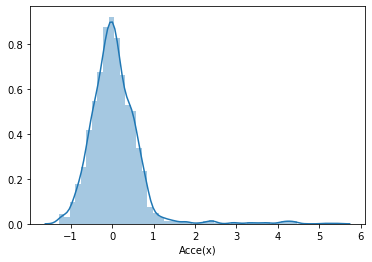

In [15]:
#
sns.distplot(data['Acce(x)'])

The plot above is showing how the datas of  Acce(x) column are distributed. This plot shows that the datas are skewed to the right. Which means our dataset consists of outliers.


And if we check the mean and the median of Acce(x) above, they are not too far from each other. Median= 0.0000 and the Mean is 0.061873. 
We can feel confortable with this result because the mean deviated from the median(centre of the plot) is not up too one standard deviation. Since our focus in this project is just to recongnise and classify different activities that took place while riding the bicycle, then we might not bother to remove the outliers.

We might ask ourselves 'why is the median is 0.0000?' This is a good question, is't.

The zeros record for Acce(x) might be the starting point.  When there was no mmovement or when the bicycle is at it initial(rest) state and any force hasn't been apply.


Next, let's dive into the visaualization of our datas and see what it's look like.


## Datas Visualization

In [16]:
#let drop columns that it's not neccessary for the analysis.
#I suggest we drop the first two columns.

data2= data.drop('cts', axis=1) #This is use to monitor the input of a datas into the computer.
# cts help not to overwhelmed the computer so that computer won't crash.
# cts gives a notification if the computer isfull with datas.
df=  data2.drop('date', axis=1)


Now let's make a plot to see how the weather look when thsi project was carried out.

In [17]:
df.corr() #correlation matrix table 

,temp,Acce(z),Acce(x),Acce(y),Gyro(z),Gyro(x),Gyro(y)
temp,1.000000,0.066007,0.250042,0.081389,0.182307,-0.192978,0.114487
Acce(z),0.066007,1.000000,-0.052300,0.319149,0.109735,-0.256567,-0.314098
Acce(x),0.250042,-0.052300,1.000000,0.216601,0.457252,-0.451564,0.166545
Acce(y),0.081389,0.319149,0.216601,1.000000,0.226136,-0.394158,0.010585
Gyro(z),0.182307,0.109735,0.457252,0.226136,1.000000,-0.462738,0.517787
Gyro(x),-0.192978,-0.256567,-0.451564,-0.394158,-0.462738,1.000000,-0.110253
Gyro(y),0.114487,-0.314098,0.166545,0.010585,0.517787,-0.110253,1.000000


The table above shows both positives and negatives correlation. Acce(x) and Gyro(z) is only where we have higher postivities correlation. 

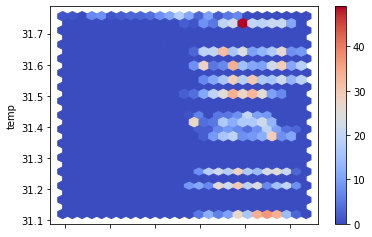

In [18]:
df.plot.hexbin(y='temp',  x='Gyro(x)',gridsize =25, cmap= 'coolwarm')

I plotted this graph to show how the weather was on the day this datas was collected. From the statistics table above, the average value for the temperature is 31.4......We can see from the plot that the values that was recorded is within 31.1- 31.7 above.

Which means that the weather was ok. There is probability that UK experience very hot weather on this day. Which is good for our analysis. High breeze weather could bring about many outliers in the dataset.

In [19]:
#Now let's visualize our dataset with 3D. We imported plotly and cufflinks for a surface plot.

#calling out the accceleration from the dataset
Acceleration = df[['Acce(z)', 'Acce(x)', 'Acce(y)']]#calling out the accceleration from the dataset

In [20]:
#To avoid overfitting, we sample our dataset.
Acce1= Acceleration.head(200)
Acce1

,Acce(z),Acce(x),Acce(y)
0,-8.616307,-0.474820,1.618705
1,-8.529976,-0.544365,1.484412
2,-8.472422,-0.592326,1.513189
3,-8.395683,-0.604317,1.565947
4,-8.280576,-0.640288,1.736211
...,...,...,...
195,-11.208633,0.115108,1.141487
196,-11.333333,0.071942,1.026379
197,-11.446043,-0.007194,0.971223
198,-11.549161,-0.081535,0.935252


In [21]:
#Sample the dataset here also.
Gyroscope = df[['Gyro(z)', 'Gyro(x)', 'Gyro(y)']]
Gyro1= Gyroscope.head(200)
Gyro1

,Gyro(z),Gyro(x),Gyro(y)
0,0.222577,-0.072417,-0.155485
1,0.225772,-0.064963,-0.149095
2,0.224707,-0.070288,-0.138445
3,0.225772,-0.077742,-0.130990
4,0.227902,-0.077742,-0.126731
...,...,...,...
195,0.183174,0.088392,-0.018104
196,0.157614,0.063898,-0.034079
197,0.143770,0.037274,-0.044728
198,0.144835,0.012780,-0.046858


In [22]:
#This plot is showing various forces which was applied that brings about displacemet.
Acce1.iplot(kind='surface', colorscale='rdylbu')

In [23]:
#This is the plot that shows the activities that took place.
Gyro1.iplot(kind='surface', colorscale='rdylbu')

From this surface plot above, we could see clearly that there is less of smooth ride. There was so much displacement while riding the bicycle. Sometimes the displacement is very high and sometimes very low depending on the force. Very difficult to talk about beacuse there are lots of chaos. Let's see the result we will derive from our prediction.

 ## Datas Prediction

What we are doing here is to use KMeans algorithms to predict our result. We shouldn't forget the reason why we want to use KMeans algorithms. The dataset we are using is unsupervised dataset, no categorical column, so our assignment is to use Kmeans method to find the optimal clutering that would enable us to identify different activies that took place.

In [24]:
# for the KMeans method, two colums would be used. Here we plot Acce(x) againt Gyro(x).
#We are doing this to bring the same activies together and seperate them from others.
X1 = df[['Acce(x)', 'Gyro(z)']]
X= np.array(X1.head(500))

In [25]:
X # Array of X

array([[-4.74820144e-01,  2.22577210e-01],
       [-5.44364508e-01,  2.25772098e-01],
       [-5.92326139e-01,  2.24707135e-01],
       [-6.04316547e-01,  2.25772098e-01],
       [-6.40287770e-01,  2.27902023e-01],
       [-6.83453237e-01,  2.24707135e-01],
       [-7.84172662e-01,  2.17252396e-01],
       [-8.84892086e-01,  2.01277955e-01],
       [-9.23261391e-01,  1.84238552e-01],
       [-9.52038369e-01,  1.81043663e-01],
       [-9.64028777e-01,  1.93823216e-01],
       [-9.49640288e-01,  2.16187433e-01],
       [-9.54436451e-01,  2.24707135e-01],
       [-1.00239808e+00,  2.12992545e-01],
       [-1.03836931e+00,  1.76783813e-01],
       [-1.08872902e+00,  1.22470714e-01],
       [-1.13669065e+00,  7.34824280e-02],
       [-1.14628297e+00,  4.15335460e-02],
       [-1.20863309e+00,  3.30138450e-02],
       [-1.23741007e+00,  5.32481360e-02],
       [-1.27577938e+00,  9.90415340e-02],
       [-1.29256595e+00,  1.55484558e-01],
       [-1.26618705e+00,  2.12992545e-01],
       [-1.

In [26]:
# Here we need to use of elbow method,  which would help us to choose the the number of centroid.
# Centroids are the values which the dataset would clutering around.
distortion= []
K= range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeanModel.fit(scale(X))
    distortion.append(kmeanModel.inertia_)

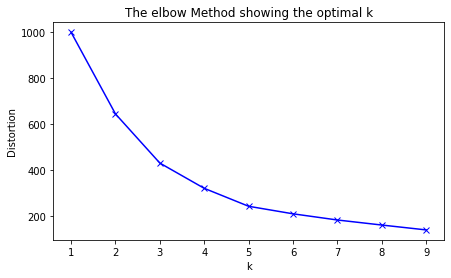

In [27]:
plt.figure(figsize=(7,4))
plt.plot(K, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow Method showing the optimal k')
plt.show()

The elbow graph above is showing how k-cluters descent from higher to the lowest, for better prediction. It is better for us to choose our number of clusters from where the graph started descending. And we can see that the diagram above started descending from k= 3. Therefore, we choose cluter= 3 for our result.

In [28]:
#KMeans for 3 clusters
kmeanModel = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans= kmeanModel.fit(X)

In [29]:
y_kmeans.labels_ # Our predicted values of y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
#Plot showing how the datas  were clustered around their centroids.
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans.labels_ ==0, 0],  X[y_kmeans.labels_ ==0, 1], s=100, c='red', label= 'cluster 1')
plt.scatter(X[y_kmeans.labels_ ==1, 0],  X[y_kmeans.labels_ ==1, 1], s=100, c='blue', label= 'cluster 2')
plt.scatter(X[y_kmeans.labels_ ==2, 0],  X[y_kmeans.labels_ ==2, 1], s=100, c='green', label= 'cluster 3')
plt.scatter(kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:, 1], s=200, c='yellow', label= 'Centroid')
plt.legend()
plt.xlabel('Accelerator')
plt.ylabel('Gyroscope')
plt.title('Clustering')
plt.show()

The three activities that took place is showing different things. From the first cluster, we could see  that there is a small amount of forces applied followed by the second cluster and the last is the third cluster. 

Secondly, we could see their displacement which I can now called the activities of each clusters. All the three clusters shows a very high displacement, which means probably the first cluster  is when the boy/girl was avoiding people walking road, and the third cluster might be as a result of road bumbs. But if we could take time to study what has happened in the second cluster we will see that alot of displacement actually took place. And some of the things that must have happened are.

i. Maybe the boy/girl is just learning how to ride a bicycle.

ii. Maybe the bicycle is not balance on the road dew to the fact that stabilizer is not probably fixed, and the parent have to put the bicycle down inorder to get it fix .

iii. Bike Low Technology


In [ ]:
# Before we jumped into conclusion, it's better we visuliaze the predicted values.
plt.figure(figsize=(10,6))
plt.hist(y_kmeans.labels_,  color = "Red", lw=0, )
plt.title('X-test prediction')
plt.show()

#As we have said, the third cluster has the highest number of clustering.

## Observations

Like I listed above. There are so much of displacement that took place in the second cluster. 
The first thing is that, suppose the boy/girl is just learning how to ride a bicycle, he or she might find it so difficult to ride. Parents of this categories of children might not enjoy riding the bicycle together with them. Or probably children riding this particular product always sustains injury on the road and many parents might have witness this terrible scenerios. One of the thing that could happen is that the children might talk to their friends about it, either in school or elsewhere. And those friends would definitely tell their parents not to get them that particular bike products. These might have been one of the reason that is affecting the sales.
      
Secondly, maybe the bicycle is not balance on the road dew to the fact that stabilizer is not probably fixed. Not every parents are capable to fix bicycle and the stabilizer very well especially the singles parents because they don't have enough tools. Some that has tools sometimes might find it difficult to understand the assemble manual that came with the product. And when a bicycle is not probably fix, children won't be able to enjoys their ride.


Another thing is low technology.  It sounds embarracing for any parent to start fixing a bicycle for their children on the road. All these might have been the major cause of this problem.

There are alot of competitors out there, which are seriously looking for the way to mazimax their profits everyday. And the best way to move ahead of them is to improve the technology of the product and also improve the sales stragegies every six month.

## Solution And  Conclusion

i. I would suggest the company to provide a learning videos and fixing videos for every parents buying this product. And this should be flexible, not something that would send to emails which would require a download. The videos must be able to transfer directly to either there whatzapp or any easiest paltform for them to watch as soon as they get home.

ii. Another thing they could do is to employ an engineers to different stations where this products have been distributed. They help fix the bike and make a free delivery to the owner the  within 24hours without extra charges.


iii. Improve their bicycle technology for it to be balance on the road.  After improving the technology of the bike,  they should make it avoidable for an average person to buy.


In conclusion, I suggest they should identify  where their most profitable clients are, and start and start this new stragies with them. 


